# Import Modules

In [1]:
import os
import json

import pandas as pd
import missingno as msno

from tqdm import tqdm

# Dataframe Display Options

In [2]:
pd.options.display.max_rows = 100
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 100

# Processed Data Paths

In [3]:
tsvDirectory = "./processed/tsv/"
jsonDirectory = "./processed/json/"

In [4]:
tsvFileList = os.listdir(tsvDirectory)
tsvFileList.remove(".ipynb_checkpoints")
jsonFileList = os.listdir(jsonDirectory)

In [5]:
tsvFileList

['english-hindi-all-linked.tsv',
 'english-hindi-assamese-linked.tsv',
 'english-hindi-bengali-gujarati-kannada-malayalam-punjabi-telugu-tamil-urdu-linked.tsv',
 'english-hindi-bengali-linked.tsv',
 'english-hindi-bodo-linked.tsv',
 'english-hindi-gujarati-linked.tsv',
 'english-hindi-kannada-linked.tsv',
 'english-hindi-kashmiri-linked.tsv',
 'english-hindi-konkani-linked.tsv',
 'english-hindi-linked.tsv',
 'english-hindi-malayalam-linked.tsv',
 'english-hindi-manipuri-linked.tsv',
 'english-hindi-marathi-linked.tsv',
 'english-hindi-nepali-linked.tsv',
 'english-hindi-oriya-linked.tsv',
 'english-hindi-punjabi-linked.tsv',
 'english-hindi-sanskrit-linked.tsv',
 'english-hindi-tamil-linked.tsv',
 'english-hindi-telugu-linked.tsv',
 'english-hindi-urdu-linked.tsv']

# Load the TSVs into Dataframes

In [6]:
dataFrameDictionary = {}

for file in tqdm(tsvFileList):
    key = file.split(".")[0]
    dataFrameDictionary[key] = pd.read_csv(os.path.join(tsvDirectory,file),sep="\t")

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:06<00:00,  3.04it/s]


# Dataframe Dictionary Keys

In [7]:
[x.split(".")[0] for x in tsvFileList]

['english-hindi-all-linked',
 'english-hindi-assamese-linked',
 'english-hindi-bengali-gujarati-kannada-malayalam-punjabi-telugu-tamil-urdu-linked',
 'english-hindi-bengali-linked',
 'english-hindi-bodo-linked',
 'english-hindi-gujarati-linked',
 'english-hindi-kannada-linked',
 'english-hindi-kashmiri-linked',
 'english-hindi-konkani-linked',
 'english-hindi-linked',
 'english-hindi-malayalam-linked',
 'english-hindi-manipuri-linked',
 'english-hindi-marathi-linked',
 'english-hindi-nepali-linked',
 'english-hindi-oriya-linked',
 'english-hindi-punjabi-linked',
 'english-hindi-sanskrit-linked',
 'english-hindi-tamil-linked',
 'english-hindi-telugu-linked',
 'english-hindi-urdu-linked']

# Sample Dataframe Access

In [8]:
sampleDataframe = dataFrameDictionary["english-hindi-all-linked"]

In [9]:
sampleDataframe.head()

,english_word,pos,english_gloss,assamese_gloss,assamese_synset,bodo_gloss,bodo_synset,gujarati_gloss,gujarati_synset,hindi_gloss,hindi_synset,kannada_gloss,kannada_synset,kashmiri_gloss,kashmiri_synset,konkani_gloss,konkani_synset,malayalam_gloss,malayalam_synset,manipuri_gloss,manipuri_synset,marathi_gloss,marathi_synset,nepali_gloss,nepali_synset,oriya_gloss,oriya_synset,punjabi_gloss,punjabi_synset,sanskrit_gloss,sanskrit_synset,tamil_gloss,tamil_synset,telugu_gloss,telugu_synset,urdu_gloss,urdu_synset
0,a cappella,VERB,without musical accompaniment;they performed a cappella,নাকে বা মুখেৰে বায়ু সুমুওৱা আৰু উলিয়াই দিয়া;জীৱই উশাহ-নিশাহ লয়,উশাহ-নিশাহ লোৱা;শ্বাস-প্রশ্বাস লোৱা,गन्थं एबा खुगाजों हां लानाय आरो एंगारनाय;जिउवारिफ्रा हां लायो,हां ला;हां बो,નાક કે મુખથી શ્વાસ લેવો અને છોડવો;સજીવ શ્વાસ લે છે,શ્વાસ લેવો;શ્વસન ક્રિયા;શ્વાસોચ્છવાસની ક્રિયા,नाक या मुँह से साँस लेना और छोड़ना:सजीव साँस लेते हैं,साँस लेना;सांस लेना;श्वसन करना;श्वास लेना;श्वासोच्छवास करना,ಮೂಗು ಅಥವಾ ಬಾಯಿಯ ಮೂಲಕ ಉಸಿರನ್ನು ತೆಗೆದುಕೊಂಡು ಹೊರಗೆ ಬಿಡುವ ಪ್ರಕ್ರಿಯೆ;ಸಂಜೀವ ಉಸಿರಾಡುತ್ತಿದ್ದಾನೆ,ಉಸಿರಾಡು;ಶ್ವಾಸೋಚ್ಚಾರ ಮಾಡು,نَستہِ یا ٲسہٕ سۭتۍ شہہ ہیوٚن یاترٛاونٕچ عَمَل;تٔمِس چُھ شہہ ہیٚنَس منٛز تَکلیٖف گَژھان,شہہ ہیوٚن یا ترٛاوُن,नाकांतल्यान वा तोंडांतल्यान प्राणवाय भितर घेवपाची वा सोडपाची क्रिया;रामाक स्वास घेवपाक त्रास जातात,स्वास घेवप,വായിലൂടെയും;മൂക്കിലൂടെയും ശ്വസിക്കുകയോ നിശ്വസിക്കുകയോ ചെയ്യുന്ന പ്രക്രിയ;ജീവനുള്ളവ ശ്വസിക്കുന്നു,ശ്വസിക്കുക;ശ്വാസം വലിക്കുക;ഉച്ഛ്വസിക്കുക;ശ്വാസംകഴിക്കുക;ശ്വാസോച്ഛ്വാസംചെയ്യുക,nAtoN nxtr_g ciNdgi nuQsix ciQsiNb amsuQ TAdoCp;ahiQb jibn sor hoLli,sor honb;nuqsasor honb,नाकाने वायू शरीरात घेणे व बाहेर सोडणे:सजीव श्वास घेतात,श्वास घेणे;श्वसन करणे;श्वासोच्छवास करणे;श्वासोश्वास करणे,नाक वा मुखबाट सास लिनु र छोड्नु:सजीवहरू सबैले सास फेर्छन्,सास फेर्नु;सास लिनु,ନାକ ବା ମୁହଁବାଟେ ଶ୍ୱାସ ନେବା ଓ ଛାଡ଼ିବା:ସଜୀବମାନେ ଶ୍ୱାସପ୍ରଶ୍ୱାସ ନିଅନ୍ତି,ଶ୍ୱାସପ୍ରଶ୍ୱାସ ନେବା;ଶ୍ୱାସଗ୍ରହଣ କରିବା,ਨੱਕ ਜਾਂ ਮੂੰਹ ਨਾਲ ਸਾਹ ਲੈਣਾ ਜਾਂ ਛੱਡਣਾ;ਸੰਜੀਵ ਸਾਹ ਲੈਂਦੇ ਹਨ,ਸਾਹ ਲੈਣਾ;ਸੁਵਾਸ ਲੈਣਾ,श्वसनानुकूलव्यापारः;सजीवाः श्वसन्ति,श्वस्;प्र+अन्,ஆசுவாசப்படுத்திக்கொள்ளுதல்;உயிருள்ளவைகள் மூடுவிடுகிறது,மூச்சுவிடு;மூச்சுவிடுதல்,ఆక్సిజన్ని తీసుకోవడం;సంజీవ్ శ్వాస తీసుకుంటున్నాడు,శ్వాసతీసుకొను;ఊపిరిపీల్చుకొను,ناک یا منہ سےسانس لینا اور چھوڑنا;جاندار سانس لیتے ہیں,سانس لینا،دم لینا
1,abandoned,ADJECTIVE,forsaken by owner or keeper;weed-grown yard of an abandoned farmhouse,এৰা অৱস্থা বা পৃথক কৰা;তেওঁ নিজৰ পৰিত্যক্ত পত্নীক পুনৰ নিজৰ কৰি লʼলে,পৰিত্যক্ত,गारनाय;एंगारनाय एबा गुबुन खालामनाय;बियो गावनि एंगारनाय हिनजावखौ फिन बजबना लाफिनो,एंगारनाय;नागारनाय;गारनाय,ત્યાગેલું;છોડેલું કે અલગ કરેલું;તેણે પોતાની પરિત્યક્ત પત્નીને ફરીથી અપનાવી લીધી,પરિત્યક્ત;ત્યક્ત;ત્યજેલું;અપવર્જિત;અવસૃષ્ટ;આવર્જિત,त्यागा;छोड़ा अथवा अलग किया हुआ:उसने अपनी परित्यक्त पत्नी को फिर से अपना लिया,परित्यक्त;त्यक्त;बहिष्कृत;अपरिगृहीत;अपवर्जित;हीन;अपविद्ध;अपास्त;अभिनियुक्त;अवसृष्ट;आवर्जित,ತ್ಯಾಗಮಾಡಿದ;ತೆಜಿಸಿದ ಅಥವಾ ಬೇರೆಯಾದ;ಅವನು ತನ್ನ ಪರಿತ್ಯಕ್ತ;ಹೆಂಡತಿಯನ್ನು ಮತ್ತೆ ಸೇರಿಸಿಕೊಂಡ/ಮನೆಯಲ್ಲೆ ಇರಿಸಿಕೊಂಡ,ಪರಿತ್ಯಕ್ತ;ಬಿಟ್ಟು ಬಿಟ್ಟ;ತ್ಯಜಿಸಿದ,یُس ترٛوومُت آسہِ;تٔمۍ رٔٹ پَنٕنۍ ترٛٲومٕژ زَنانہٕ بیٚیہِ,ترٛٲومٕژ,त्यागलां;सोडलां वा वेगळें केलां अशें;ताणें आपले सोडिल्ले बायलेक परतून आपणायली,सोडिल्लें;त्यागिल्लें;वर्जिल्लें,ത്യജിച്ച അല്ലെങ്കില്‍ ഉപേക്ഷിച്ചത്;അവന്‍ തന്റെ പരിത്യക്തയായ ഭാര്യയെ വീണ്ടും സ്വീകരിച്ചു,പരിത്യക്തയായ;തള്ളിക്കളഞ്ഞ;ഉപേക്ഷിക്കപ്പെട്ട,toqANn TMlrb;mhACn mhACki TAdoClurb loInbibu amuC hNn lOsLle,tadoclurb;kainrurb,सर्वथा सोडलेला;टाकलेला:तो परित्यक्त स्त्रियांच्या प्रश्नाचा अभ्यास करतो आहे,परित्यक्त;त्यक्त,त्यागेको;छोडेको अथवा छुट्‍याइएको;उसले आफ्नी त्यागेकी पत्नीलाई फेरि अप्नायो,त्यागेको;परित्यक्‍त;त्यक्‍त,ତ୍ୟାଗ କରାଯାଇଥିବା;ଛାଡ଼ି ଦିଆଯାଇଥିବା ବା ଅଲଗା କରାଯାଇଥିବା:ସେ ନିଜର ପରିତ୍ୟକ୍ତା ସ୍ତ୍ରୀକୁ ପୁଣି ଆପଣାଇଲେ,ପରିତ୍ୟକ୍ତ;ତ୍ୟକ୍ତ;ବର୍ଜିତ,ਤਿਆਗ;ਛੱਡਣਾ ਅਤੇ ਅਲੱਗ ਕੀਤਾ ਹੋਇਆ;ਉਹਨੇ ਆਪਣੀ ਛੱਡੀ ਹੋਈ ਘਰਵਾਲੀ ਨੂੰ ਫਿਰ ਤੋਂ ਅਪਣਾ ਲਿਆ,ਛੁੱਟੜ,यस्य त्यागः कृतः;तेन स्वस्य परित्यक्ता पत्नी पुनः स्वीकृता,परित्यक्त;त्यक्त,ஒரு செயலை அல்லது பொருளை வேண்டாமென்று விட்டுவிடுதல்;அவன் துறக்கப்பட்ட மனைவியை மீண்டும் தன்னுடையதா...,துறக்கப்பட்ட,త్యాగము లేక వేరుచేసిన;అతను తన వదిలేసిన భార్యను మళ్ళీ తెచ్చుకున్నాడు,వదిలేసిన;వదలబడిన;వదలిపెట్టిన

# Dataframe Statistics

In [10]:
sampleDataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14477 entries, 0 to 14476
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   english_word      14477 non-null  object
 1   pos               14477 non-null  object
 2   english_gloss     14477 non-null  object
 3   assamese_gloss    14477 non-null  object
 4   assamese_synset   14477 non-null  object
 5   bodo_gloss        14477 non-null  object
 6   bodo_synset       14477 non-null  object
 7   gujarati_gloss    14476 non-null  object
 8   gujarati_synset   14477 non-null  object
 9   hindi_gloss       14383 non-null  object
 10  hindi_synset      14383 non-null  object
 11  kannada_gloss     14477 non-null  object
 12  kannada_synset    14477 non-null  object
 13  kashmiri_gloss    14476 non-null  object
 14  kashmiri_synset   14316 non-null  object
 15  konkani_gloss     14477 non-null  object
 16  konkani_synset    14477 non-null  object
 17  malayalam_gl

In [11]:
sampleDataframe.describe()

,english_word,pos,english_gloss,assamese_gloss,assamese_synset,bodo_gloss,bodo_synset,gujarati_gloss,gujarati_synset,hindi_gloss,hindi_synset,kannada_gloss,kannada_synset,kashmiri_gloss,kashmiri_synset,konkani_gloss,konkani_synset,malayalam_gloss,malayalam_synset,manipuri_gloss,manipuri_synset,marathi_gloss,marathi_synset,nepali_gloss,nepali_synset,oriya_gloss,oriya_synset,punjabi_gloss,punjabi_synset,sanskrit_gloss,sanskrit_synset,tamil_gloss,tamil_synset,telugu_gloss,telugu_synset,urdu_gloss,urdu_synset
count,14477,14477,14477,14477,14477,14477,14477,14476,14477,14383,14383,14477,14477,14476,14316,14477,14477,14477,14477,14477,14477,14477,14477,14477,14468,14477,14477,14477,14477,14445,14477,14477,14462,14477,14474,14477,14242
unique,12180,4,6130,6097,5996,6097,5968,6095,6044,6069,5994,6097,6024,6096,5844,6097,5969,6095,5986,6082,5866,6093,5948,6095,5998,6097,6002,6097,5996,6083,6007,6095,5781,6096,5999,6094,5901
top,break,NOUN,(often followed by `of' ) a large number or amount or extent;a batch of letters;a deal of troubl...,একে ধৰণৰ বহুত বস্তুৰ কিছুমান ওখ সমষ্টি;ৰাম আৰু শ্যামৰ মাজত শস্যৰ দʼমৰ ভাগ-বাটোৱাৰা হʼল,দʼম;সমূহ;সমষ্টি;গোট;ৰাশি,रोखोमसे गोबां मुवाफोरनि खायसे दामोलनि गासिबो;राम आरो श्यामनि गेजेराव फसलनि दामोलनिफ्राय रानो,दामोल;थुबुर;थुब,એક જેવી ઘણી બધી વસ્તુઓને મોટો સમુહ;રામ અને શ્યામની વચ્ચે અનાજના અંબારનો ભાગ પડ્યો,ઢગલો;અંબાર;મોટો ઢગલો;કોઠાર;ભંડાર;સમૂહ;રાશિ;ઢગ;ગંજ;પુંજ;કૂટ;પ્રસર,एक जैसी वस्तुओं का कुछ ऊँचा समूह:राम और श्याम के बीच अनाज के ढेर का बँटवारा हुआ,ढेर;अंबार;अंबर;अम्बार;अम्बर;राशि;गंज;जखीरा;अटंबर;अटाला;अटाल;अटम;चय;अटा;कूट;अमार;प्रसर;संभार;सम्भ...,ಯಾವುದಾದರೂ ಒಂದೇ ವಸ್ತುವಿನ ಸಮೂಹ;ಹಳ್ಳಿಗಳಲ್ಲಿ ಸುಗ್ಗಿಯ ಸಂದರ್ಭದಲ್ಲಿ ಧಾನ್ಯಗಳ ರಾಶಿಯನ್ನು ಪೂಜೆ ಮಾಡುತ್ತಾರೆ,ರಾಶಿ;ಗುಂಪು;ಸಮೂಹ,واریاہن ہِوی چیزن ہُنٛد اَکھ بوٚڑ ڑیر;رامس تہٕ شامس دَرمیان گوٚو دانہِ ڑیرس حِصہٕ,ڈیر; اَمبار,एकाच सारक्या खूब वस्तूंचो मातसो ऊंच पुंजुलो;राम आनी शाम हांचे मदीं धान्याचे राशीची वांटणी जाली,रास;ढीग,ഒരുപോലത്തെ അനേകം വസ്തുക്കളുടെ കുറച്ച് ഉയര്ന്ന സമൂഹം;രാമിന്റേയും ശ്യാമിന്റേയും ഇടയില്‍ ധാന്യത്തിന...,കൂമ്പാരം;കൂന;കൂട്ടം,cF mANnb poxsiQgi mpY;rAM amsuQ sy_AMgi mrCt mhY-mroQgi puCkY yeNToCnre,pucky,एकाच प्रकारच्या वस्तूंचा उंच समूह:तेथे सर्वत्र बर्फाचे ढीग साठले होते,ढीग;रास,एकै जस्तो धेरै वस्तुको केही अग्लो समूह;राम र श्यामका बीच अन्न राशिको भाग भयो,राशि,ଏକାଭଳି ବହୁତଗୁଡ଼ିଏ ବସ୍ତୁର କିଛି ସମୂହ ଆକାର:ରାମ ଓ ଶ୍ୟାମ ମଧ୍ୟରେ ଶସ୍ୟରାଶିର ବଣ୍ଟନ ହେଲା,ରାଶି;ଗଦା;ଚୟ;ସମ୍ଭାର;ସଂଶ୍ଳିଷ୍ଟ;ଅମାର;ଜମା,ਇਕੋ ਜਿਹੀਆਂ ਬਹੁਤ ਸਾਰੀ ਵਸਤੂਆਂ ਦਾ ਕੁੱਝ ਉੱਚਾ ਸਮੂਹ;ਰਾਮ ਅਤੇ ਸ਼ਾਮ ਦੇ ਵਿਚ ਅਨਾਜ ਦੇ ਢੇਰ ਦਾ ਬਟਵਾਰਾ ਹੋਇਆ,ਢੇਰ;ਢੇਰੀ;ਅੰਬਰ;ਅੰਬਾਰ;ਅੰਮਬਾਰ,रामश्यामयोर्मध्ये अन्नस्य राशेः विभाजनं कृतम्,,ஒன்றின் மீது ஒன்றாக் ஓர் இடத்தில் குவிக்கப்பட்டுள்ள பொருள்களின் தொகுப்பு;அங்கே தானியக்குவியல் நி...,குவியல்,వస్తువుల సమూహము;రాము మరియు శ్యామ ఇద్దరు ధాన్యరాశులను బాగం పంచుకొన్నారు,రాశి;కుప్ప;పోగు;ప్రోగు;ప్రోవు;చాలు,ایک جیسی بہت سی اشیاء کا کچھ اونچا مجموعہ;رام اور شیام کے درمیان اناج کے ڈھیر کا بٹوارا ہوا,ذخیرہ،انبار،ڈھیر
freq,14,8578,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,30,27,27,27,27,27,27,27,27,27,29,27,28,27,27,27,27


<AxesSubplot: >

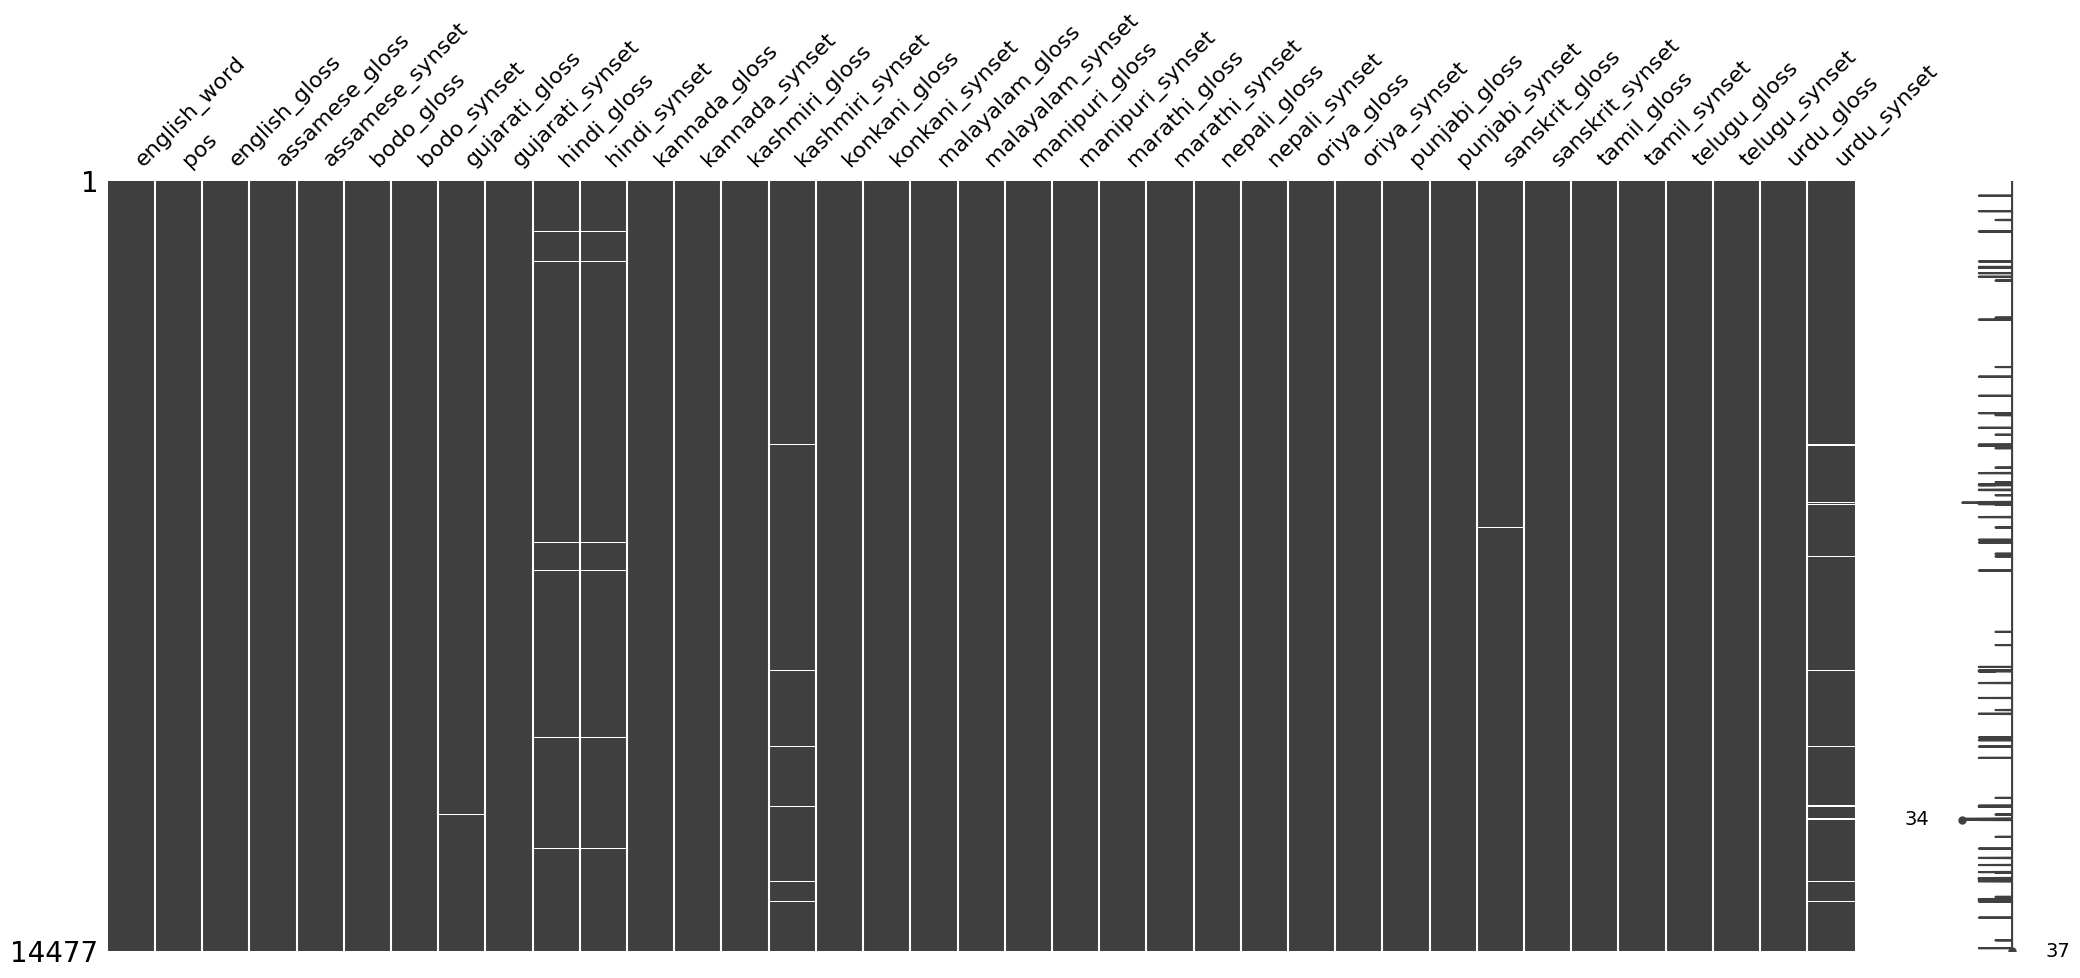

In [12]:
msno.matrix(sampleDataframe)

# Sample JSON Data Access

In [13]:
jsonFileList

['english-hindi-all-linked.json',
 'english-hindi-assamese-linked.json',
 'english-hindi-bengali-gujarati-kannada-malayalam-punjabi-telugu-tamil-urdu-linked.json',
 'english-hindi-bengali-linked.json',
 'english-hindi-bodo-linked.json',
 'english-hindi-gujarati-linked.json',
 'english-hindi-kannada-linked.json',
 'english-hindi-kashmiri-linked.json',
 'english-hindi-konkani-linked.json',
 'english-hindi-linked.json',
 'english-hindi-malayalam-linked.json',
 'english-hindi-manipuri-linked.json',
 'english-hindi-marathi-linked.json',
 'english-hindi-nepali-linked.json',
 'english-hindi-oriya-linked.json',
 'english-hindi-punjabi-linked.json',
 'english-hindi-sanskrit-linked.json',
 'english-hindi-tamil-linked.json',
 'english-hindi-telugu-linked.json',
 'english-hindi-urdu-linked.json']

In [14]:
def loadJSON(filename):
    with open(filename,encoding="utf-8") as f:
        jsonData = json.load(f)
    return jsonData

In [15]:
sampleJson = loadJSON(os.path.join(jsonDirectory,'english-hindi-all-linked.json'))

In [16]:
for key in sampleJson.keys():
    print(key)

a cappella
abandoned
derelict
abandonment
forsaking
desertion
abdicable
abdomen
venter
stomach
belly
abeyant
suspended
abhorrent
detestable
obscene
repugnant
repulsive
abient
ablaze
afire
aflame
aflare
alight
blazing
burning
flaming
on fire
able
capable
abloom
efflorescent
abortion
abortive
stillborn
unsuccessful
absence
absent
absolved
clear
cleared
exculpated
exonerated
vindicated
absorbed
absorption
soaking up
abstemious
abuse
clapperclaw
blackguard
shout
insult
revilement
contumely
vilification
abusive
acacia
academic
academic degree
degree
academy
honorary society
accept
admit
take
take on
have
accepted
recognized
recognised
undisputed
unchallenged
unquestioned
accessible
accessory
appurtenance
supplement
add-on
accident
fortuity
chance event
acclaim
acclamation
plaudits
plaudit
eclat
accomplishable
achievable
doable
manageable
realizable
accomplished
complete
accordingly
account
business relationship
accountant
comptroller
controller
accredited
commissioned
licensed
licenced
accu

In [17]:
sampleJson["abandoned"]

[{'pos': 'ADJECTIVE',
  'english_gloss': 'forsaken by owner or keeper;weed-grown yard of an abandoned farmhouse',
  'assamese_gloss': 'এৰা অৱস্থা বা পৃথক কৰা;তেওঁ নিজৰ পৰিত্যক্ত পত্নীক পুনৰ নিজৰ কৰি লʼলে',
  'assamese_synset': 'পৰিত্যক্ত',
  'bodo_gloss': 'गारनाय;एंगारनाय एबा गुबुन खालामनाय;बियो गावनि एंगारनाय हिनजावखौ फिन बजबना लाफिनो',
  'bodo_synset': 'एंगारनाय;नागारनाय;गारनाय',
  'gujarati_gloss': 'ત્યાગેલું;છોડેલું કે અલગ કરેલું;તેણે પોતાની પરિત્યક્ત પત્નીને ફરીથી અપનાવી લીધી',
  'gujarati_synset': 'પરિત્યક્ત;ત્યક્ત;ત્યજેલું;અપવર્જિત;અવસૃષ્ટ;આવર્જિત',
  'hindi_gloss': 'त्यागा;छोड़ा अथवा अलग किया हुआ:उसने अपनी परित्यक्त पत्नी को फिर से अपना लिया',
  'hindi_synset': 'परित्यक्त;त्यक्त;बहिष्कृत;अपरिगृहीत;अपवर्जित;हीन;अपविद्ध;अपास्त;अभिनियुक्त;अवसृष्ट;आवर्जित',
  'kannada_gloss': 'ತ್ಯಾಗಮಾಡಿದ;ತೆಜಿಸಿದ ಅಥವಾ ಬೇರೆಯಾದ;ಅವನು ತನ್ನ ಪರಿತ್ಯಕ್ತ;ಹೆಂಡತಿಯನ್ನು ಮತ್ತೆ ಸೇರಿಸಿಕೊಂಡ/ಮನೆಯಲ್ಲೆ ಇರಿಸಿಕೊಂಡ',
  'kannada_synset': 'ಪರಿತ್ಯಕ್ತ;ಬಿಟ್ಟು ಬಿಟ್ಟ;ತ್ಯಜಿಸಿದ',
  'kashmiri_gloss': 'یُس ترٛوومُت آسہِ;تٔمۍ رٔٹ پَن